In [1]:
library(maps)
library(mapdata)
library(ggplot2)
library(ggthemes)

In [2]:
ditch_the_axes <- theme(
  axis.text = element_blank(),
  axis.line = element_blank(),
  axis.ticks = element_blank(),
  panel.border = element_blank(),
  panel.grid = element_blank(),
  axis.title = element_blank()
  )

mytheme <- theme_few(base_size=16, base_family="Helvetica")

In [3]:
world_map_all <- map_data("world")
world_map = world_map_all[world_map_all$region != 'Antarctica', ]

In [4]:
df = read.csv("../data/world_map_steps_average_20170510.csv") 

In [5]:
world_map_data_wsteps = merge(world_map, df, by = "region", all.x = TRUE)
# order is critical for drawing
world_map_data_wsteps = world_map_data_wsteps[with(world_map_data_wsteps, order(order)), ]

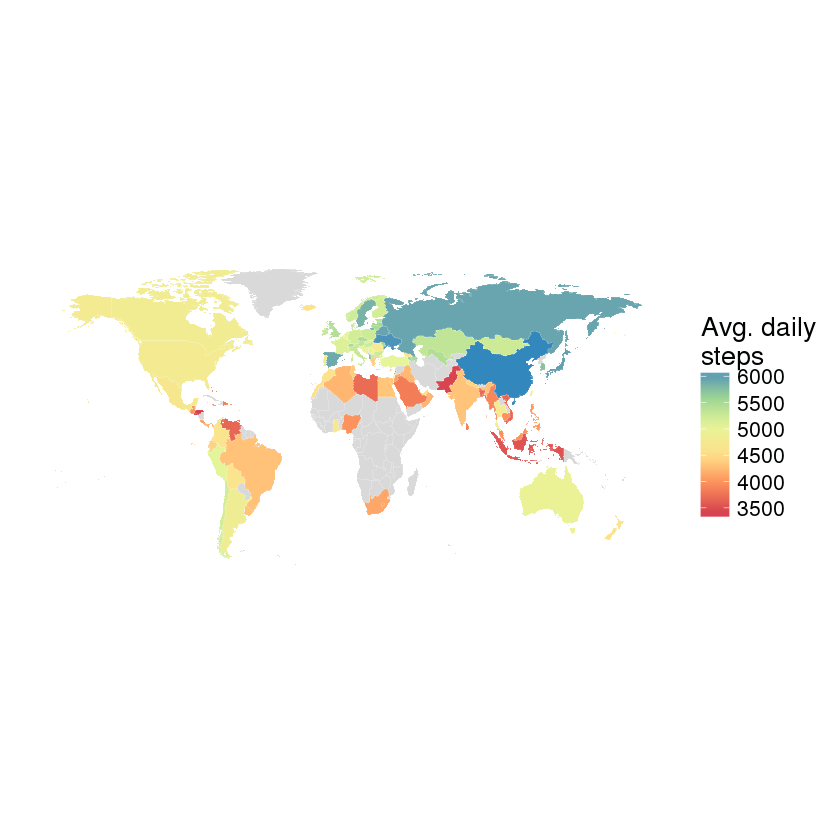

In [6]:
p <- ggplot() + 
    geom_polygon(aes(long,lat, group=group, fill=steps_mean_filtered), data=world_map_data_wsteps) +
    geom_polygon(data = world_map_data_wsteps, fill = NA, color = "white", size=.03, aes(long,lat, group=group)) + 
    scale_fill_distiller(palette = "Spectral", direction=1, na.value = "gray85", 
                  guide = guide_colorbar(title="Avg. daily\nsteps", direction = "vertical", title.position="top")) +
    mytheme + 
    coord_fixed(1.3) + 
    ditch_the_axes + 
    theme(legend.position = "right")
    p

ggsave(filename="../output/fig1a.pdf", plot=p, width=8, height=3)